In [33]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

fileDir = os.path.dirname('__file__')

### Get the unit conversion factors

In [34]:
uomconv_banner = pickle.load(open(os.path.join(fileDir, 'pickle_files_banner', 'banner2ism_uomconv.pkl'), 'rb'))

In [35]:
uomconv_stm = pickle.load(open(os.path.join(fileDir, 'pickle_files_stm', 'stm2ism_uomconv.pkl'), 'rb'))

### Load the I/O matrices

In [4]:
# def unpickle(filepath):
#     f = open(filepath, 'rb')
#     data = pickle.load(f)
#     f.close()
#     return data

# def tt2df(data):
#     y = np.concatenate((data['y_train'], data['y_test']),axis=0)
#     X = np.concatenate((data['X_train'], data['X_test']),axis=0)
#     X_aki = pd.DataFrame(X[y>0], columns=data['predictors'])
#     X_con = pd.DataFrame(X[y==0], columns=data['predictors'])
    
#     return (X_aki, X_con)

In [5]:
# path2stm_tt = os.path.join(fileDir, 'train_test_stm6_nofill', 'stm_onset_tt_tlag006_twin006.pkl')
# path2ism_tt = os.path.join(fileDir, 'train_test_ism6_nofill', 'ism_onset_tt_tlag006_twin006.pkl')

# stm_tt = unpickle(path2stm_tt)
# ism_tt = unpickle(path2ism_tt)

# iostm_aki, iostm_con = tt2df(stm_tt)
# ioism_aki, ioism_con = tt2df(ism_tt)

In [36]:
path2iobanner_aki = os.path.join(fileDir, 'io_banner4', 'banner_onset_io_tlag006_twin006_aki.pkl')
path2iobanner_con = os.path.join(fileDir, 'io_banner4', 'banner_onset_io_tlag006_twin006_con.pkl')
path2iostm_aki = os.path.join(fileDir, 'io_stm5', 'stm_onset_io_tlag006_twin006_aki.pkl')
path2iostm_con = os.path.join(fileDir, 'io_stm5', 'stm_onset_io_tlag006_twin006_con.pkl')
path2ioism_aki = os.path.join(fileDir, 'io_ism5', 'ism_onset_io_tlag006_twin006_aki.pkl')
path2ioism_con = os.path.join(fileDir, 'io_ism5', 'ism_onset_io_tlag006_twin006_con.pkl')

iobanner_aki = pd.read_pickle(path2iobanner_aki)
iobanner_con = pd.read_pickle(path2iobanner_con)
iobanner = pd.concat([iobanner_con, iobanner_aki], axis=0)
iostm_aki = pd.read_pickle(path2iostm_aki)
iostm_con = pd.read_pickle(path2iostm_con)
iostm = pd.concat([iostm_con, iostm_aki], axis=0)
ioism_aki = pd.read_pickle(path2ioism_aki)
ioism_con = pd.read_pickle(path2ioism_con)
ioism = pd.concat([ioism_con, ioism_aki], axis=0)

In [37]:
fts = ['age', 'nsbp_last', 'ndbp_last', 'hr_last', 'spo2_last', 
       'hemoglobin_last', 'temperature_last', 'wbc_last', 'platelet_last', 
       'albumin_last', 'urine_last', 'potassium_last', 'glucose_last', 
       'creatinine_last', 'lactic_acid_last', 'potassium_last', 'osi_last', 'si_last', 'oi_last']

# fts = ['age', 'nsbp_last', 'ndbp_last', 'hr_last', 'spo2_last', 
#        'hemoglobin_last', 'temperature_last', 'wbc_last', 'platelet_last', 
#        'albumin_last', 'urine_last', 'potassium_last', 'glucose_last', 
#        'creatinine_last', 'lactic_acid_last', 'osi_last', 'si_last', 
#        'oi_last', 'bun_last', 'calcium_last', 'bilirubin_last', 
#        'ph_last', 'ratio_pao2_flo2']

In [38]:
iostm_aki['albumin_last'] = iostm_aki['albumin_last']*0.1
iostm_con['albumin_last'] = iostm_con['albumin_last']*0.1

iostm_aki['glucose_last'] = iostm_aki['glucose_last']*18.0182
iostm_con['glucose_last'] = iostm_con['glucose_last']*18.0182

iostm_aki['lactic_acid_last'] = iostm_aki['lactic_acid_last']*9.009
iostm_con['lactic_acid_last'] = iostm_con['lactic_acid_last']*9.009

iobanner_aki['lactic_acid_last'] = iobanner_aki['lactic_acid_last']*9.009
iobanner_con['lactic_acid_last'] = iobanner_con['lactic_acid_last']*9.009    

In [39]:
def plotHistogram1(series1, series2, ft_name, figdir=None):
    print(ft_name)
    series1 = series1.replace([np.inf, -np.inf], np.nan)
    series2 = series2.replace([np.inf, -np.inf], np.nan)    
    series_all = series1.append(series2)    
    series_all = series_all[~pd.isnull(series_all)]
#     if ft_name=='nsbp_last':
#         stop
    print('{} range: {} to {}'.format(ft_name, series_all.min(), series_all.max()))
    print('CHLA average: {}'.format(series1.mean()))
    print('Banner average: {}'.format(series2.mean()))
    bins=np.linspace(series_all.min(), series_all.max(), 100)

    data = [series1, series2]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
#     title_strs = ['CHLA', 'St.Mary']
    plt.sca(ax)
    plt.hold(True)
    nmv0 = np.sum(pd.isnull(data[0]))
    ndp0 = len(data[0])
    prv0 = float(nmv0)/float(ndp0)*100
    nmv1 = np.sum(pd.isnull(data[1]))
    ndp1 = len(data[1])
    prv1 = float(nmv1)/float(ndp1)*100
    plt.hist(data[0][~pd.isnull(data[0])], bins, normed=True, alpha=0.5, 
             label='CHLA ; NMV={}/{} ({})'.format(nmv0, ndp0, np.round(prv0)))
    plt.hist(data[1][~pd.isnull(data[1])], bins, normed=True, alpha=0.5, 
             label='Banner ; NMV={}/{} ({})'.format(nmv1, ndp1, np.round(prv1)))
    plt.legend(loc='upper right')
    plt.title(ft_name)    
    plt.grid()
    plt.xlabel(ft_name.replace('_', ' '))
    plt.ylabel('Normalized frequency')
    plt.show()
    if figdir is not None:
        figname = os.path.join(figdir, '{}.png'.format(ft_name))
        fig.savefig(figname)

In [48]:
def plotHistogram(series11, series12, series21, series22, series31, series32, ft_name, figdir=None):
    series_all = series11.append(series12)
    series_all = series_all.append(series21)
    series_all = series_all.append(series22)
    series_all = series_all.append(series31)
    series_all = series_all.append(series32)
    series_all = series_all[~pd.isnull(series_all)]
#     if ft_name=='nsbp_last':
#         stop
    print(series_all.min())
    print(series_all.max())
    bins=np.linspace(series_all.min(), series_all.max(), 100)
    data_list = [[series11, series12], [series21, series22], [series31, series32]]
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(13, 11))
    title_strs = ['CHLA', 'St.Mary', 'Banner']
    for ax, data, title_str in zip(axs.reshape(-1), data_list, title_strs):
        plt.sca(ax)
        plt.hold(True)
        nmv0 = np.sum(pd.isnull(data[0]))
        ndp0 = len(data[0])
        prv0 = float(nmv0)/float(ndp0)*100
        nmv1 = np.sum(pd.isnull(data[1]))
        ndp1 = len(data[1])
        prv1 = float(nmv1)/float(ndp1)*100
        prv_all = (nmv0+nmv1)/float(ndp0+ndp1)*100
        print('{} missing value prevalence: {}'.format(title_str, np.round(prv_all)))
        plt.hist(data[0][~pd.isnull(data[0])], bins, normed=True, alpha=0.5, 
                 label='y=0 ; NMV={}/{} ({})'.format(nmv0, ndp0, np.round(prv0)))
        plt.hist(data[1][~pd.isnull(data[1])], bins, normed=True, alpha=0.5, 
                 label='y=1 ; NMV={}/{} ({})'.format(nmv1, ndp1, np.round(prv1)))
        plt.legend(loc='upper right')
        plt.title(title_str)
    plt.suptitle(ft_name.replace('_', ' '), fontsize=20)
    plt.show()
    if figdir is not None:
        figname = os.path.join(figdir, '{}.png'.format(ft_name))
        fig.savefig(figname)
        

0.0848733744011
20.9917808219
CHLA missing value prevalence: 0.0
St.Mary missing value prevalence: 0.0
Banner missing value prevalence: 0.0


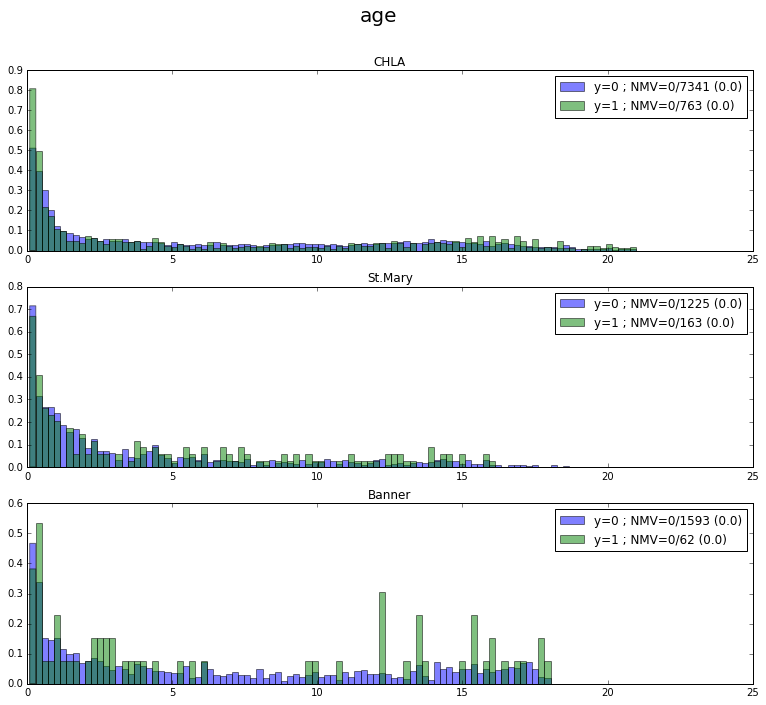

11.0
196.0
CHLA missing value prevalence: 23.0
St.Mary missing value prevalence: 19.0
Banner missing value prevalence: 9.0


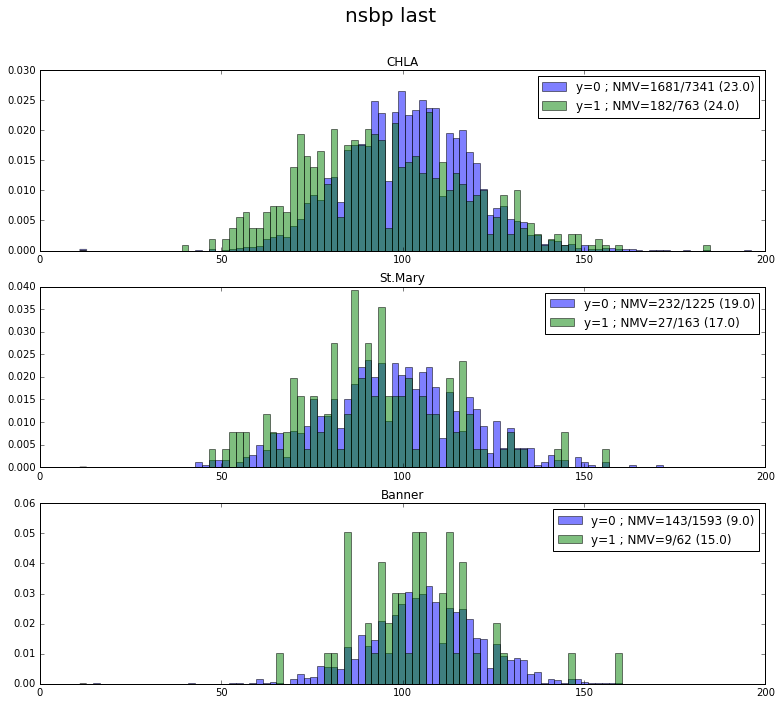

10.0
136.0
CHLA missing value prevalence: 23.0
St.Mary missing value prevalence: 19.0
Banner missing value prevalence: 10.0


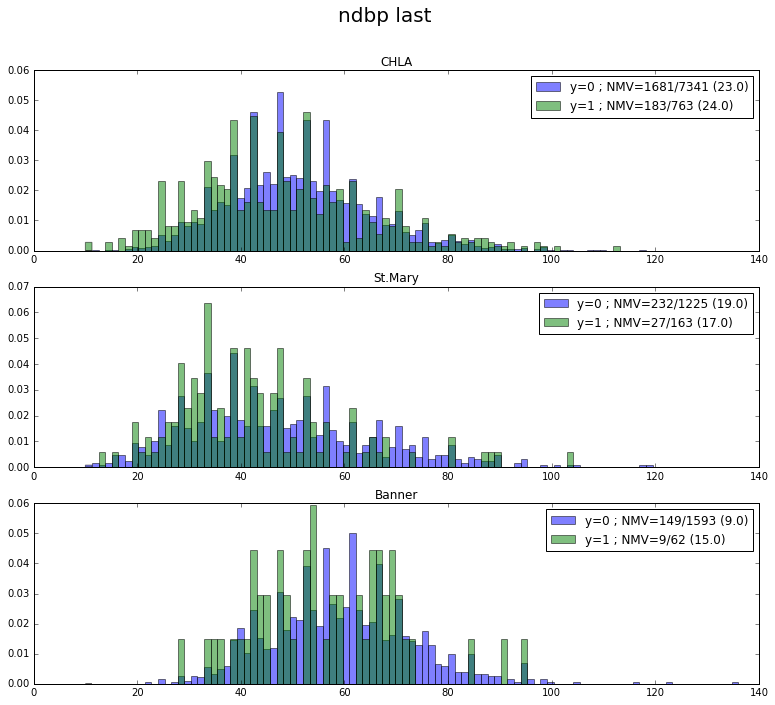

14.0
199.0
CHLA missing value prevalence: 7.0
St.Mary missing value prevalence: 3.0
Banner missing value prevalence: 1.0


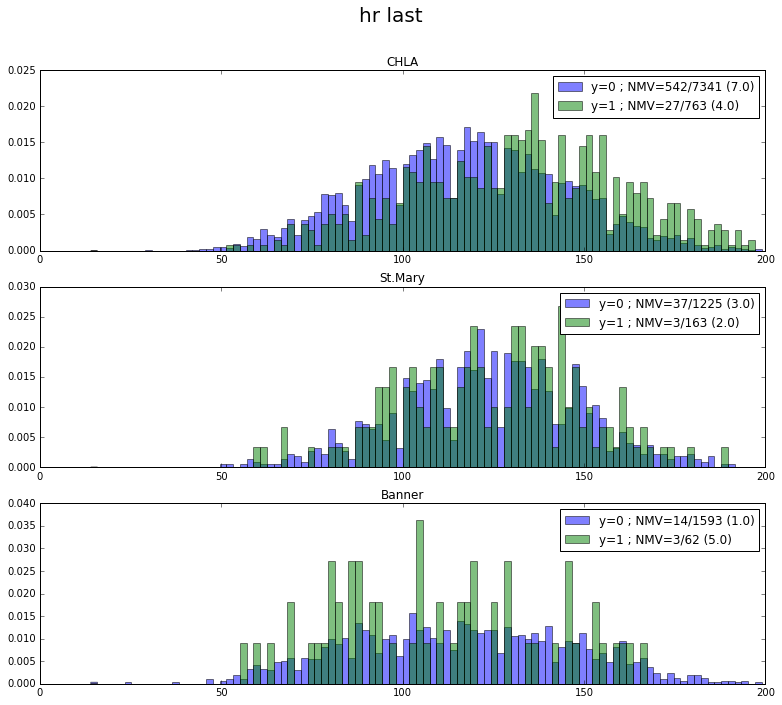

62.0
99.0
CHLA missing value prevalence: 39.0
St.Mary missing value prevalence: 24.0
Banner missing value prevalence: 34.0


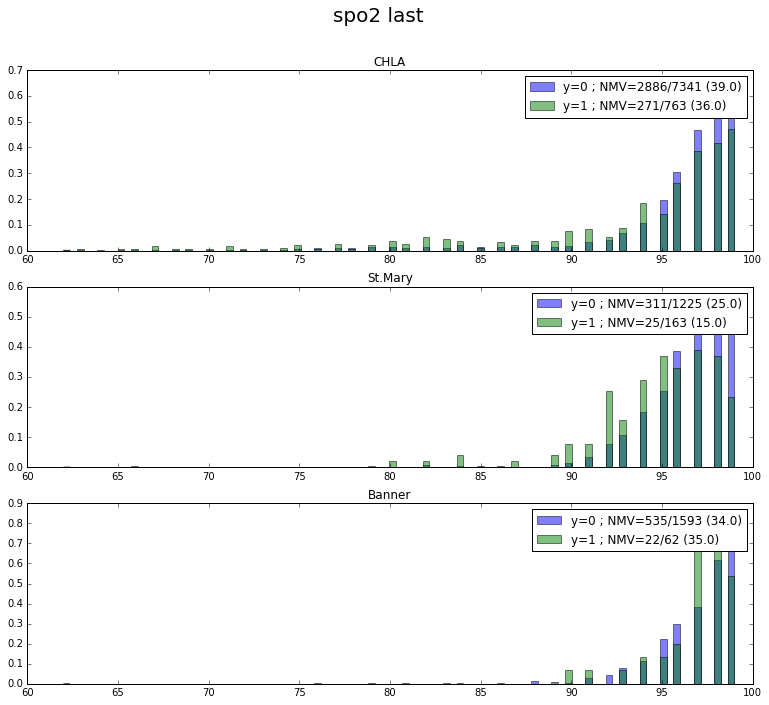

1.1
19.9
CHLA missing value prevalence: 75.0
St.Mary missing value prevalence: 75.0
Banner missing value prevalence: 99.0


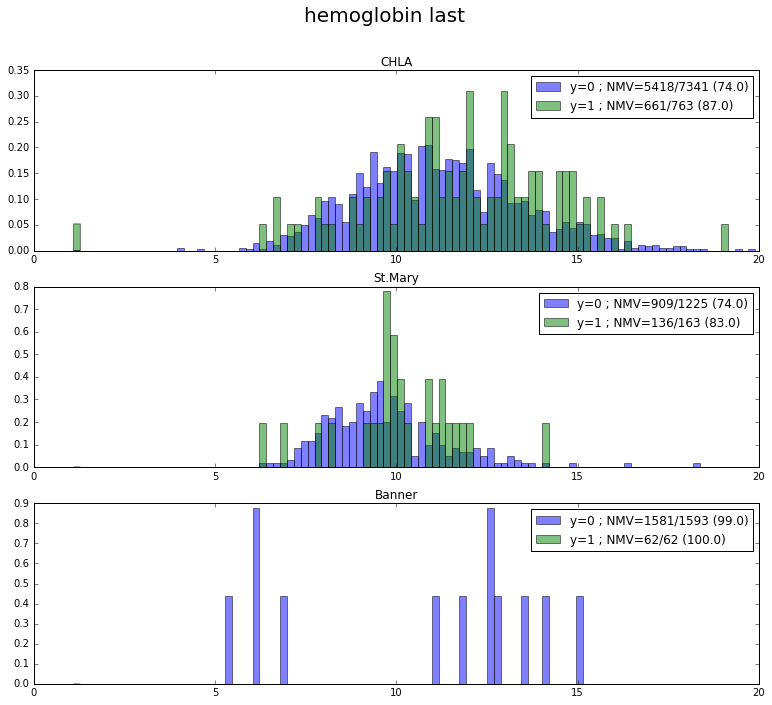

32.5
41.0
CHLA missing value prevalence: 7.0
St.Mary missing value prevalence: 5.0
Banner missing value prevalence: 2.0


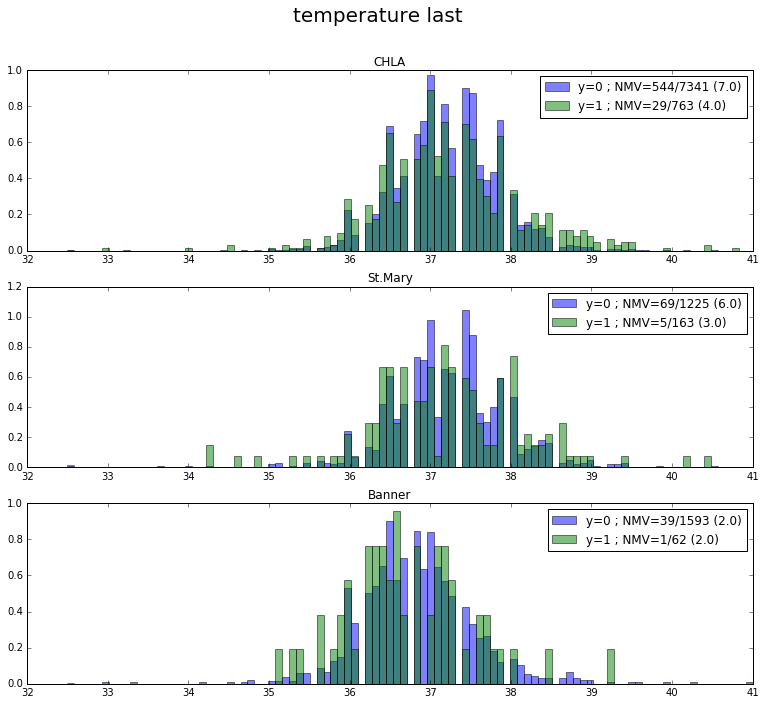

0.1
47.79
CHLA missing value prevalence: 77.0
St.Mary missing value prevalence: 89.0
Banner missing value prevalence: 86.0


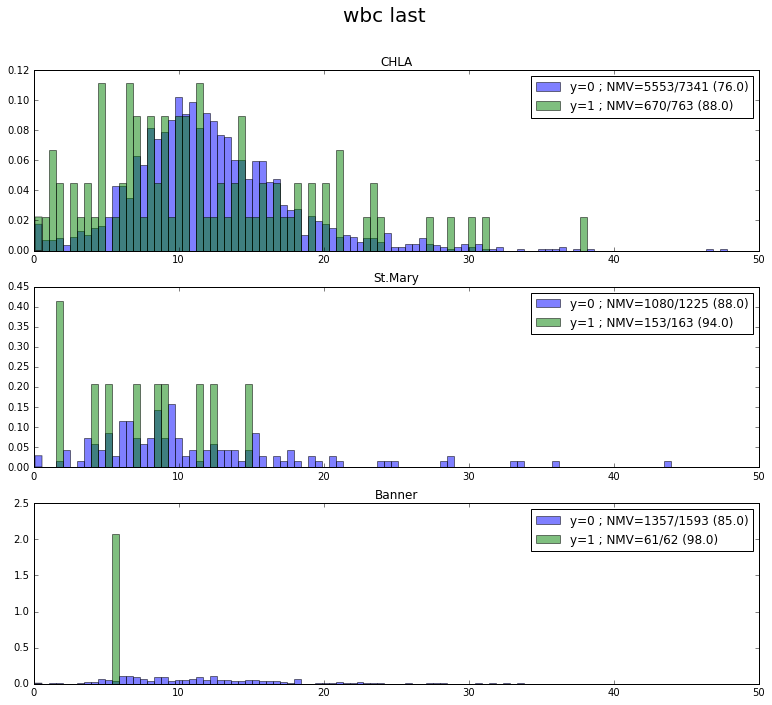

5.0
990.0
CHLA missing value prevalence: 76.0
St.Mary missing value prevalence: 79.0
Banner missing value prevalence: 86.0


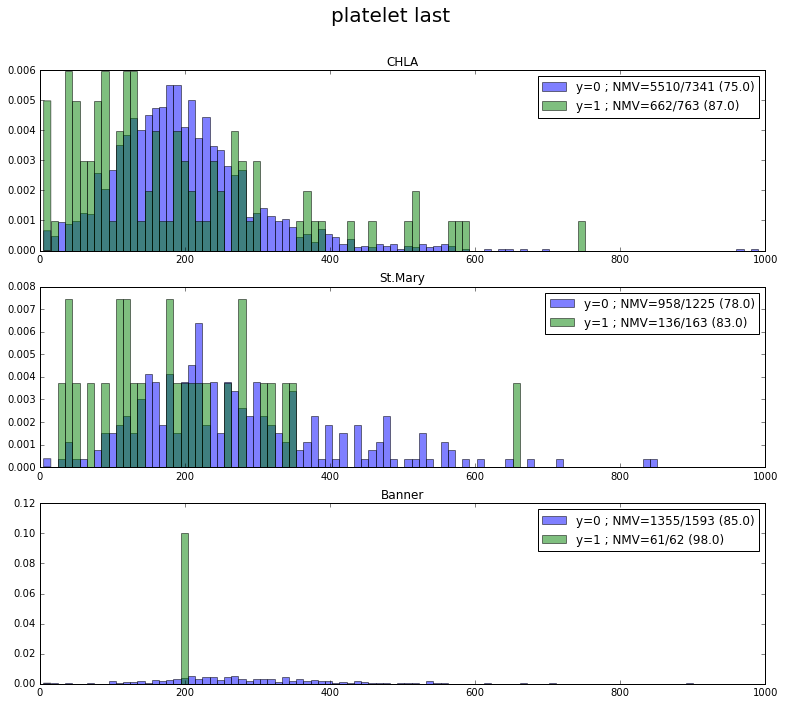

0.3
5.1
CHLA missing value prevalence: 95.0
St.Mary missing value prevalence: 79.0
Banner missing value prevalence: 87.0


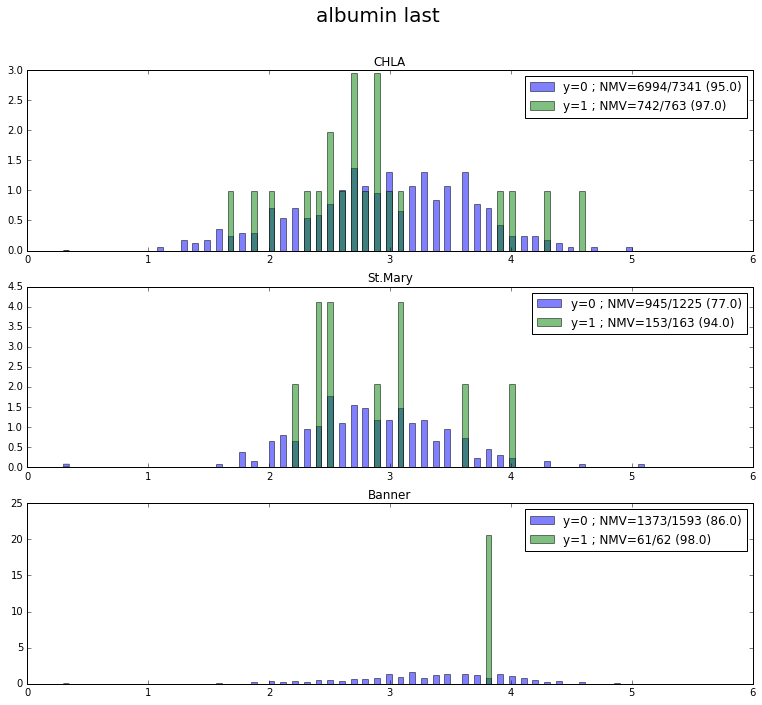

0.000887468938587
19.8999996185
CHLA missing value prevalence: 26.0
St.Mary missing value prevalence: 28.0
Banner missing value prevalence: 37.0


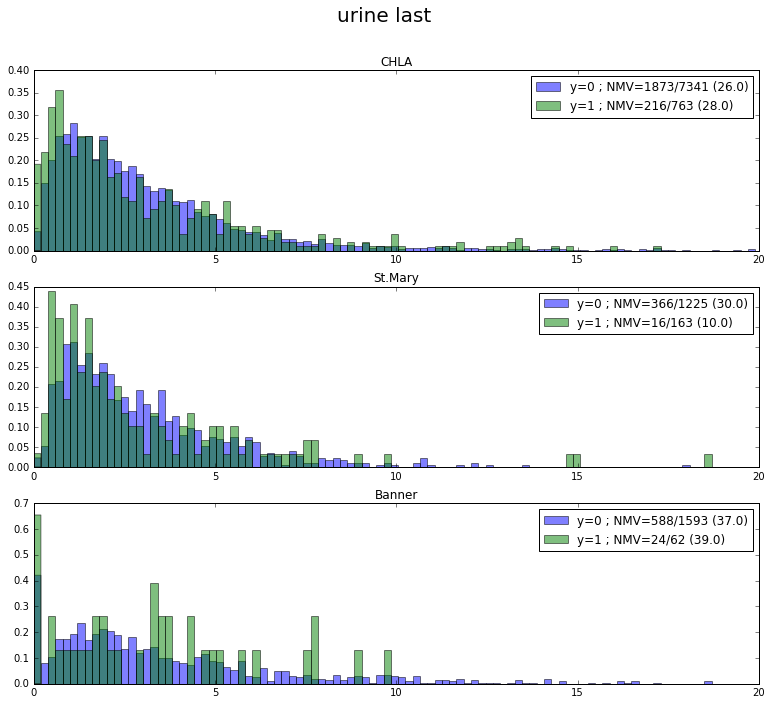

1.5
10.8
CHLA missing value prevalence: 60.0
St.Mary missing value prevalence: 27.0
Banner missing value prevalence: 76.0


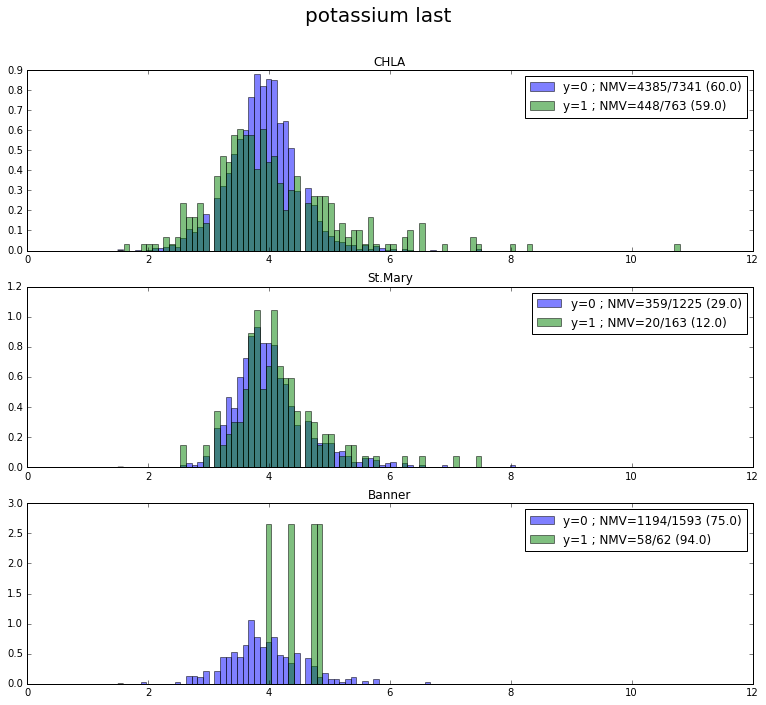

23.0
574.78058
CHLA missing value prevalence: 75.0
St.Mary missing value prevalence: 28.0
Banner missing value prevalence: 91.0


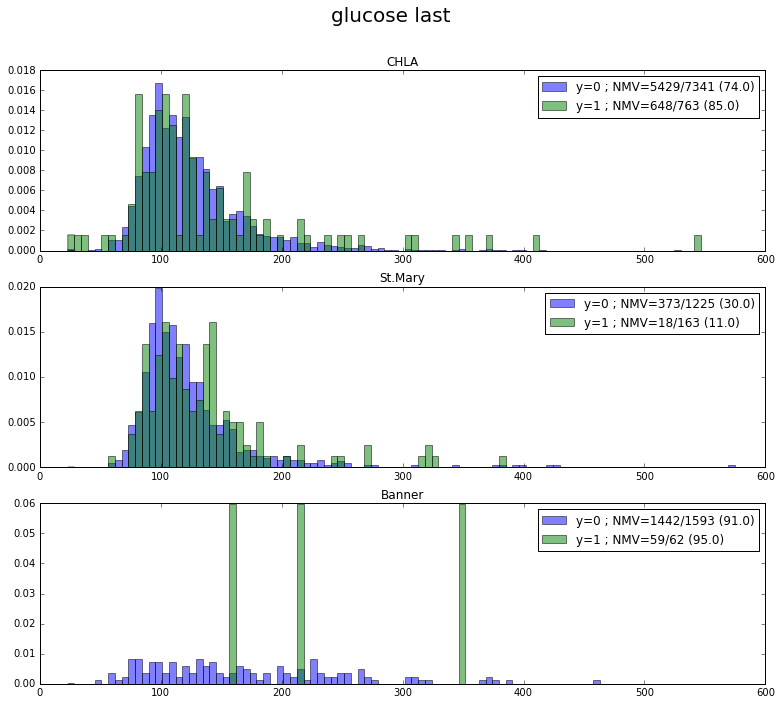

0.1
1.6
CHLA missing value prevalence: 77.0
St.Mary missing value prevalence: 77.0
Banner missing value prevalence: 76.0


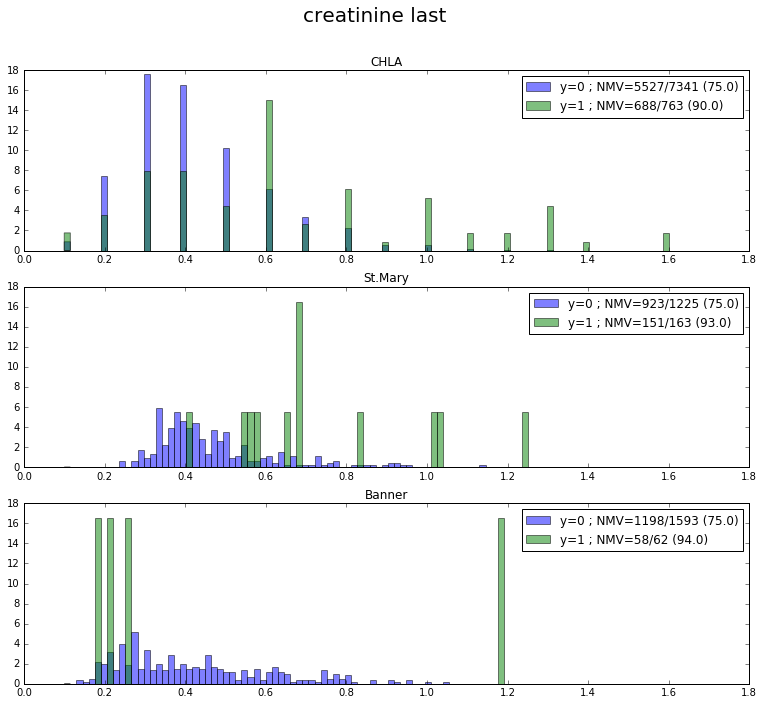

2.34234
113.5
CHLA missing value prevalence: 99.0
St.Mary missing value prevalence: 63.0
Banner missing value prevalence: 94.0


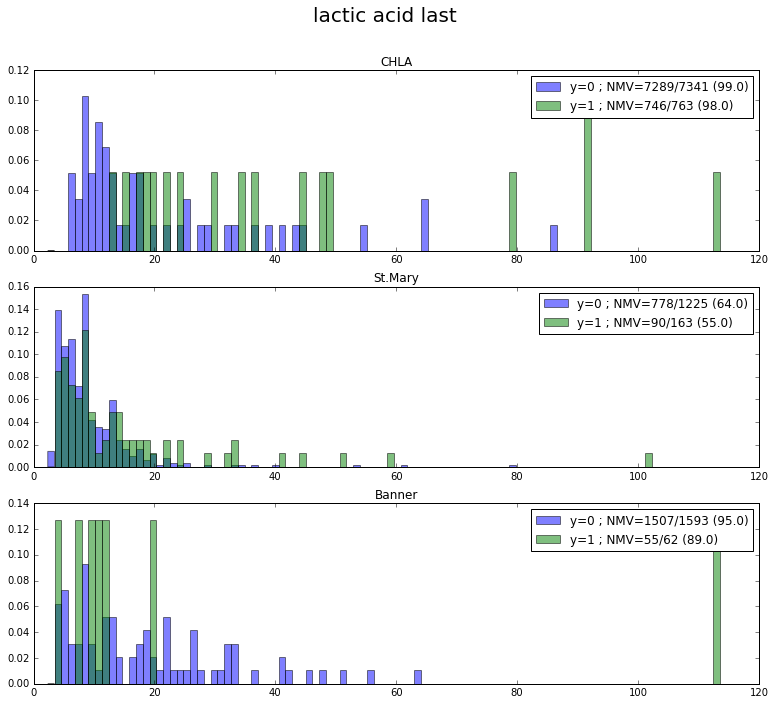

1.5
10.8
CHLA missing value prevalence: 60.0
St.Mary missing value prevalence: 27.0
Banner missing value prevalence: 76.0


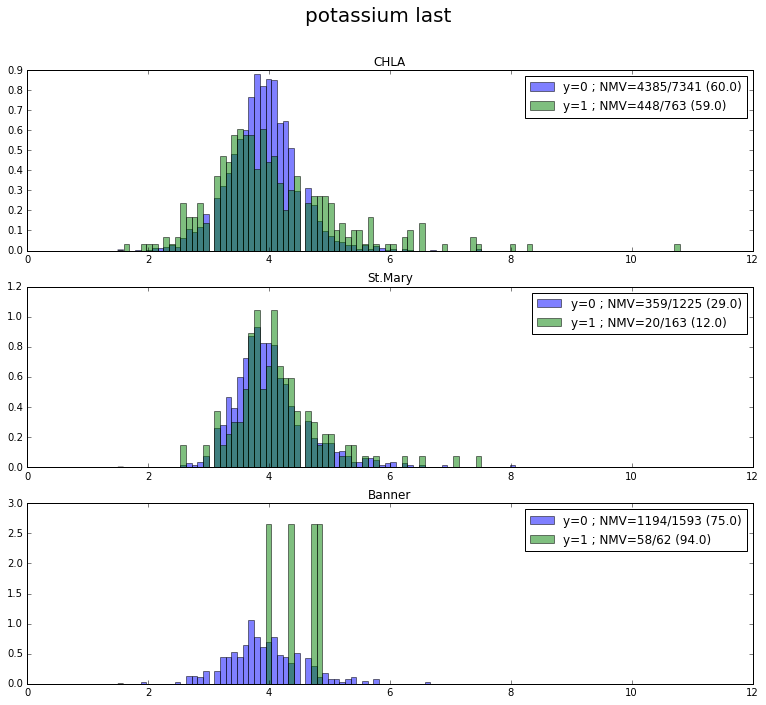

0.041999998346
62.5
CHLA missing value prevalence: 75.0
St.Mary missing value prevalence: 46.0
Banner missing value prevalence: 100.0


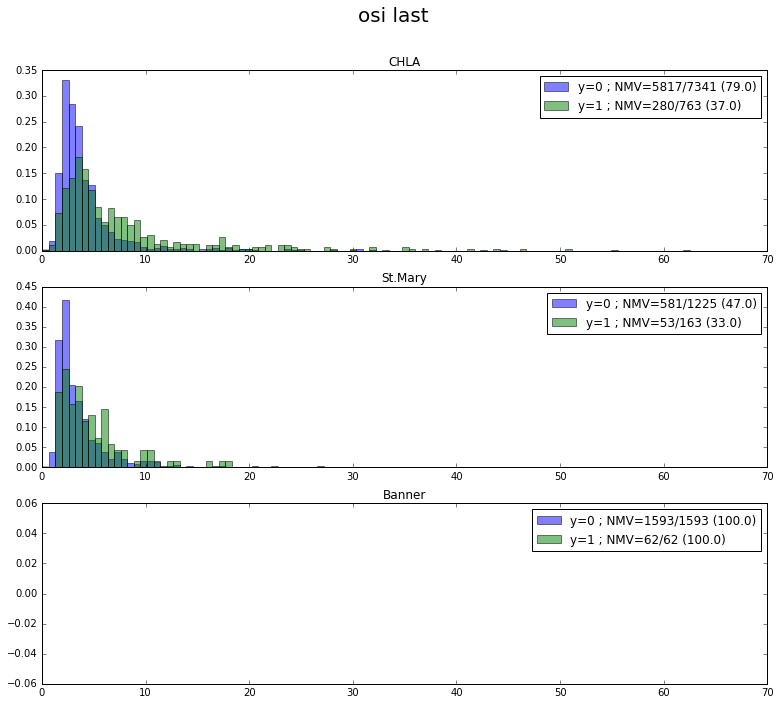

0.198347107438
4.1875
CHLA missing value prevalence: 23.0
St.Mary missing value prevalence: 19.0
Banner missing value prevalence: 10.0


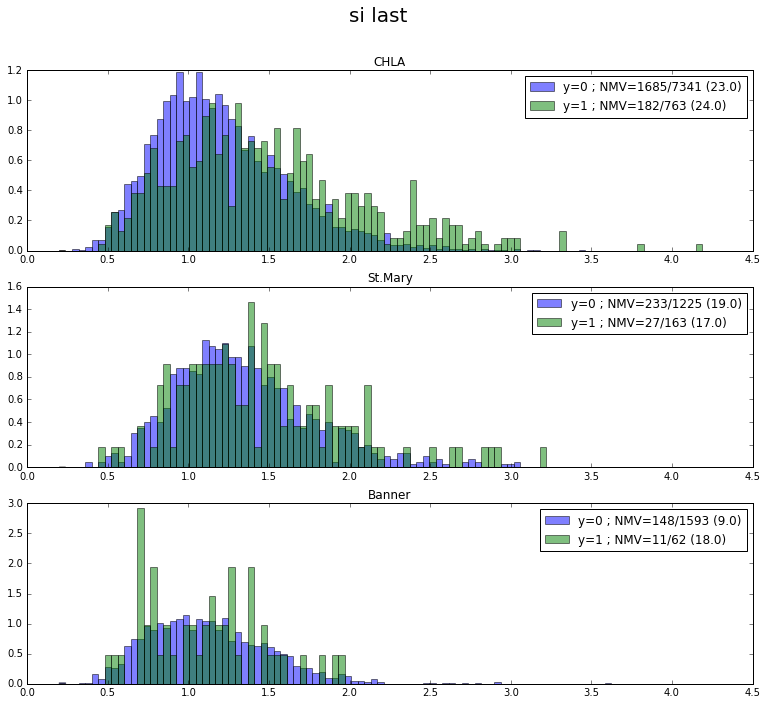

0.0701871630113
66.5158383987
CHLA missing value prevalence: 91.0
St.Mary missing value prevalence: 49.0
Banner missing value prevalence: 100.0


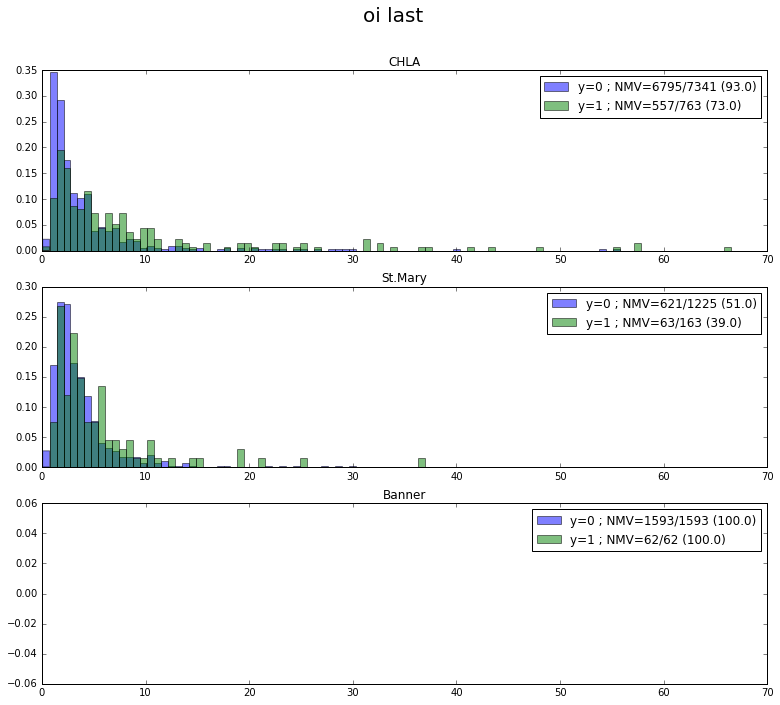

In [50]:
figdir = os.path.join(fileDir, 'distribution_compare_ism_stm_banner')
for ft in fts:
    if ft=='age':        
        s_ism_con = ioism_con[ft]/365.
        s_ism_aki = ioism_aki[ft]/365.
        s_stm_con = iostm_con[ft]/365.
        s_stm_aki = iostm_aki[ft]/365.
        s_banner_con = iobanner_con[ft]/365.
        s_banner_aki = iobanner_aki[ft]/365.
    else:
        s_ism_con = ioism_con[ft]
        s_ism_aki = ioism_aki[ft]
        s_stm_con = iostm_con[ft]
        s_stm_aki = iostm_aki[ft]
        s_banner_con = iobanner_con[ft]
        s_banner_aki = iobanner_aki[ft]
#     plotHistogram1(s_ism_con, s_ism_aki, ft, figdir=figdir)
    plotHistogram(s_ism_con, s_ism_aki, s_stm_con, s_stm_aki, s_banner_con, s_banner_aki, ft, figdir=figdir)
#     plotHistogram(s_ism_con, s_ism_aki, s_stm_con, s_stm_aki, ft, figdir=figdir)

age
age range: 0.0849315068493 to 20.9917808219
CHLA average: 6.40032961906
Banner average: 6.64501510574


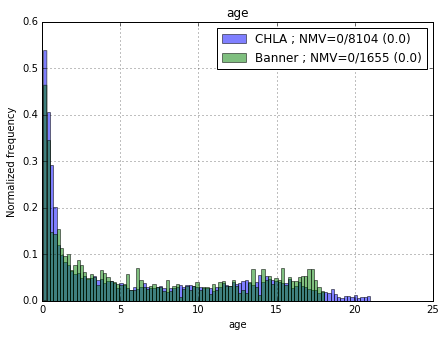

nsbp_last
nsbp_last range: 11.0 to 196.0
CHLA average: 101.037654222
Banner average: 106.272122422


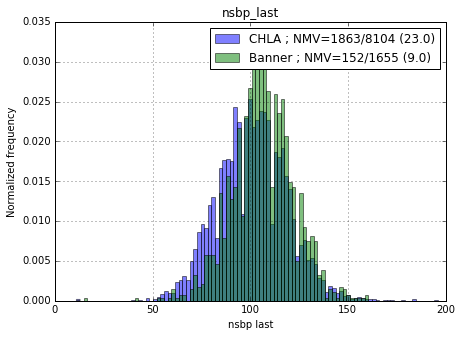

ndbp_last
ndbp_last range: 10.0 to 136.0
CHLA average: 50.7036858974
Banner average: 59.2277889112


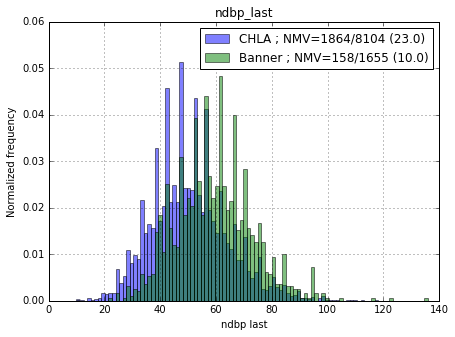

hr_last
hr_last range: 14.0 to 199.0
CHLA average: 118.409024552
Banner average: 115.969474969


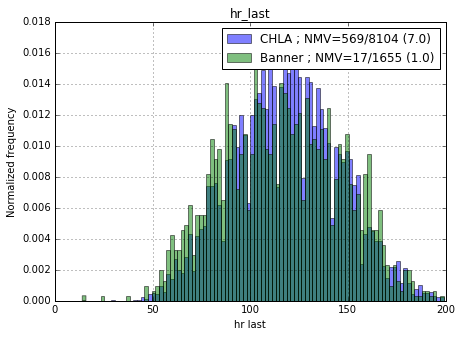

spo2_last
spo2_last range: 62.0 to 99.0
CHLA average: 95.5243581969
Banner average: 96.9754098361


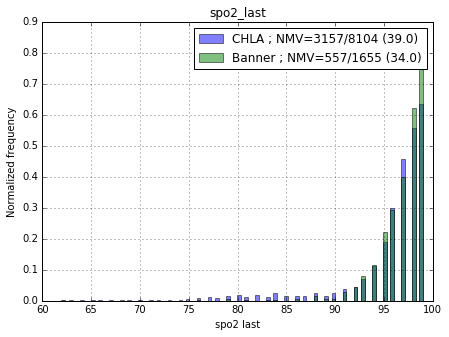

hemoglobin_last
hemoglobin_last range: 1.1 to 19.9
CHLA average: 11.2001975309
Banner average: 10.6583333333


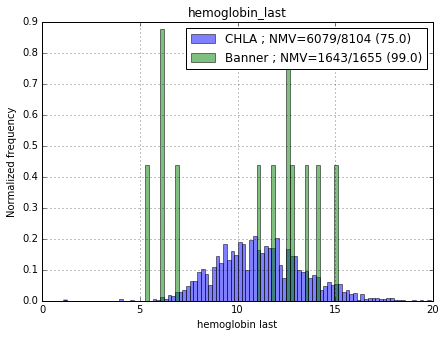

temperature_last
temperature_last range: 33.0 to 41.0
CHLA average: 37.2010359009
Banner average: 36.8226006192


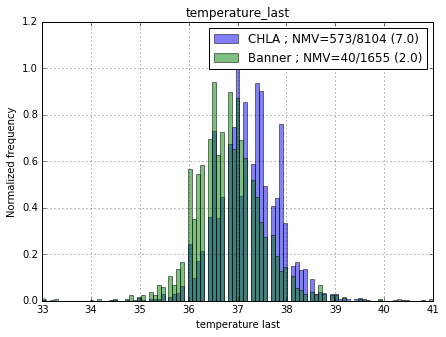

wbc_last
wbc_last range: 0.1 to 47.79
CHLA average: 12.2088038278
Banner average: 11.6067510549


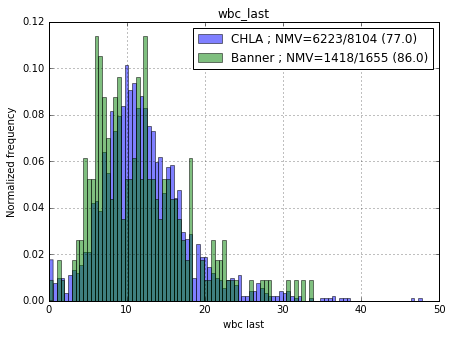

platelet_last
platelet_last range: 5.0 to 990.0
CHLA average: 197.663561077
Banner average: 286.276150628


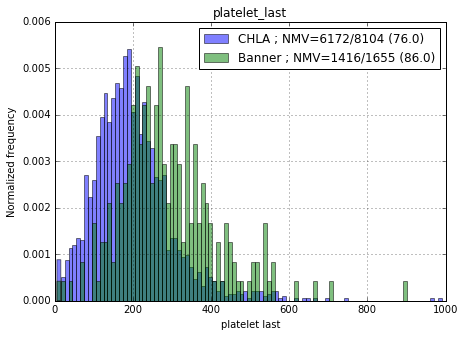

albumin_last
albumin_last range: 1.1 to 5.0
CHLA average: 2.94402173913
Banner average: 3.33031674208


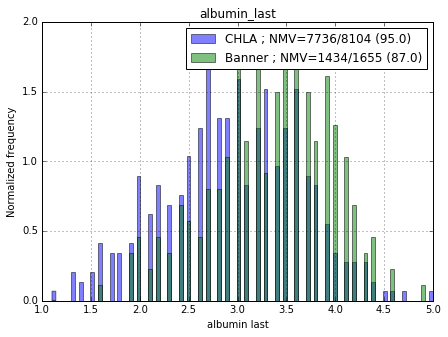

urine_last
urine_last range: 0.000887468938587 to 19.8999996185
CHLA average: 3.06784806858
Banner average: 3.55790560464


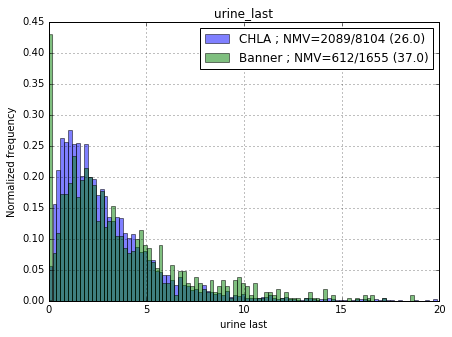

potassium_last
potassium_last range: 1.5 to 10.8
CHLA average: 3.90966065423
Banner average: 3.9300248139


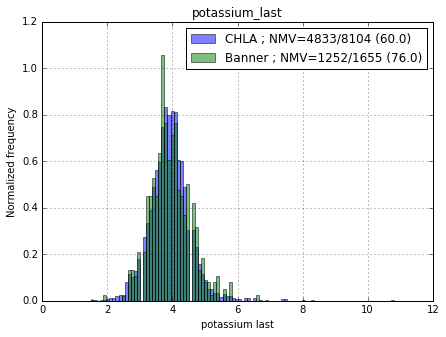

glucose_last
glucose_last range: 23.0 to 542.0
CHLA average: 126.16872225
Banner average: 170.597402597


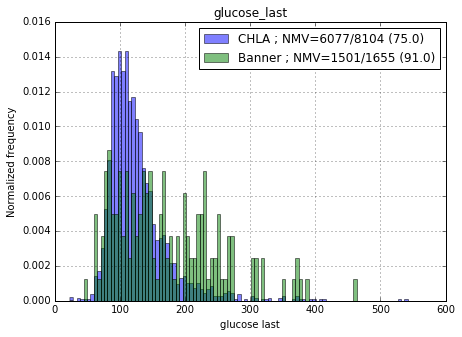

creatinine_last
creatinine_last range: 0.1 to 1.6
CHLA average: 0.432874536792
Banner average: 0.416290726817


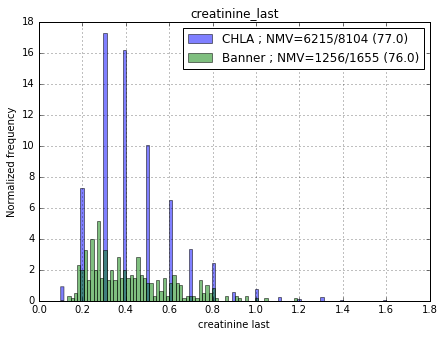

lactic_acid_last
lactic_acid_last range: 0.4 to 113.5
CHLA average: 26.7492753623
Banner average: 2.11935483871


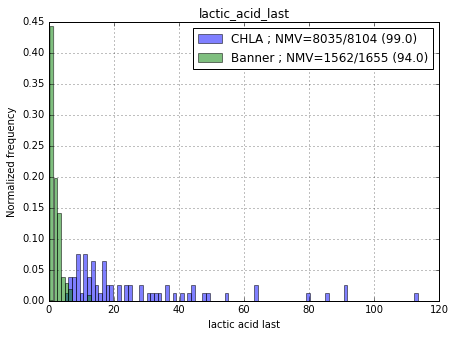

potassium_last
potassium_last range: 1.5 to 10.8
CHLA average: 3.90966065423
Banner average: 3.9300248139


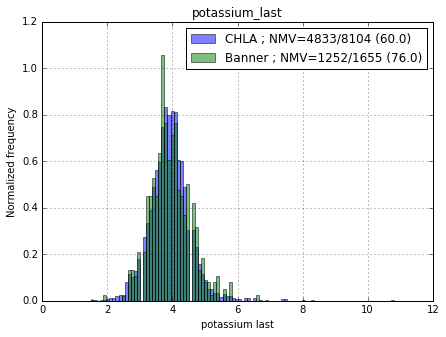

osi_last
osi_last range: 0.041999998346 to 62.5
CHLA average: 5.00156400614
Banner average: nan


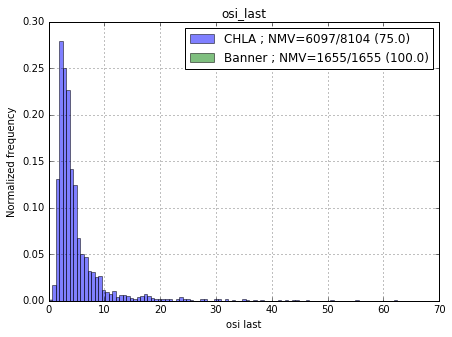

si_last
si_last range: 0.198347107438 to 4.1875
CHLA average: 1.22679080481
Banner average: 1.12776408857


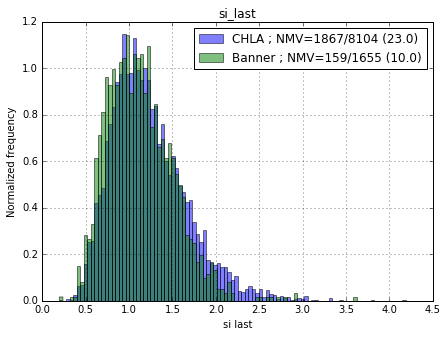

oi_last
oi_last range: 0.0701871630113 to 66.5158383987
CHLA average: 5.46107037716
Banner average: nan


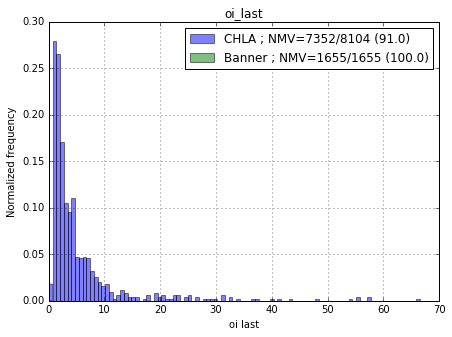

In [10]:
figdir = os.path.join(fileDir, 'distribution_banner')
for ft in fts:
    if ft=='age':        
        s_ism = ioism[ft]/365.
        s_banner = iobanner[ft]/365.        
    else:
        s_ism = ioism[ft]
        s_banner = iobanner[ft]
#     plotHistogram1(s_ism_con, s_ism_aki, ft, figdir=figdir)
    plotHistogram1(s_ism, s_banner, ft)
#     plotHistogram(s_ism_con, s_ism_aki, s_stm_con, s_stm_aki, ft, figdir=figdir)

In [11]:
print(ioism.mean(axis=0)['age']/365.)
print(iobanner.mean(axis=0)['age']/365.)

6.40032961906
6.64501510574


#### Compare distributions: 'map', 'fio2', 'pao2'

In [12]:
map_df_banner = pd.read_pickle(os.path.join(fileDir, 'item_df_banner', 'banner_map_df.pkl'))
map_df_ism = pd.read_pickle(os.path.join(fileDir, 'item_df_ism', 'ism_map_df.pkl'))

map
map range: 0.10000000149 to 96.0
CHLA average: 10.2645481866
Banner average: 8.69081632653


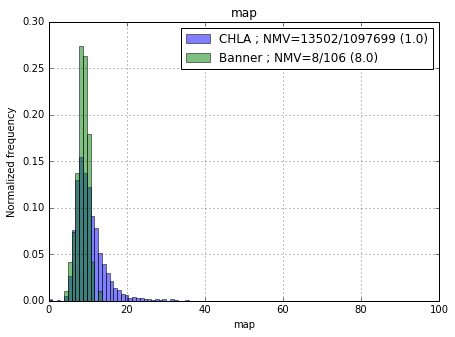

In [13]:
map_banner = map_df_banner.RESULT_VAL_num
map_ism = map_df_ism.value1

# ISM: cmH2O, Banner: mmH2O
plotHistogram1(map_ism, map_banner/10., 'map')

fio2
fio2 range: 0.0 to 7.87
CHLA average: 0.446584554275
Banner average: 0.443141891109


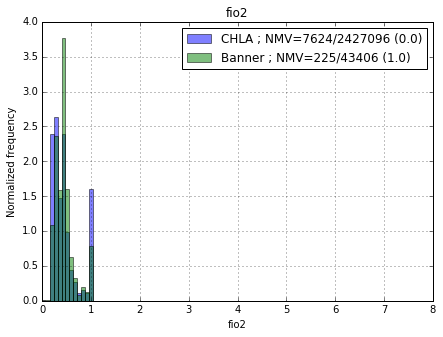

In [14]:
fio2_df_banner = pd.read_pickle(os.path.join(fileDir, 'item_df_banner', 'banner_fio2_df.pkl'))
fio2_df_ism = pd.read_pickle(os.path.join(fileDir, 'item_df_ism', 'ism_fio2_df.pkl'))
fio2_banner = fio2_df_banner.RESULT_VAL_num
fio2_ism = fio2_df_ism.value1

# ISM: fraction, Banner: %
plotHistogram1(fio2_ism, fio2_banner/100., 'fio2')

pao2
pao2 range: 0.0 to 599.0
CHLA average: 81.7413381802
Banner average: 108.458535063


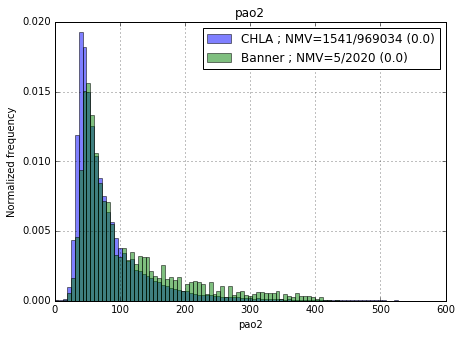

In [15]:
pao2_df_banner = pd.read_pickle(os.path.join(fileDir, 'item_df_banner', 'banner_pao2_df.pkl'))
pao2_df_ism = pd.read_pickle(os.path.join(fileDir, 'item_df_ism', 'ism_pao2_df.pkl'))
pao2_banner = pao2_df_banner.RESULT_VAL_num
pao2_ism = pao2_df_ism.value1

# ISM: mmHg, Banner: cmH2O
plotHistogram1(pao2_ism, pao2_banner/1.3595434809, 'pao2')

pH
pH range: 5.0 to 9.0
CHLA average: 7.37987871718
Banner average: 7.34175875486


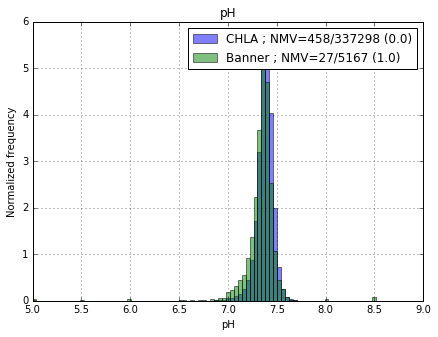

In [16]:
ph_df_banner = pd.read_pickle(os.path.join(fileDir, 'item_df_banner', 'banner_ph_df.pkl'))
ph_df_ism = pd.read_pickle(os.path.join(fileDir, 'item_df_ism', 'ism_ph_df.pkl'))
ph_banner = ph_df_banner.RESULT_VAL_num
ph_ism = ph_df_ism.value1

plotHistogram1(ph_ism, ph_banner, 'pH')

Lactic Acid
Lactic Acid range: 2.7027 to 379.0
CHLA average: 28.3444680347
Banner average: 22.6746457389


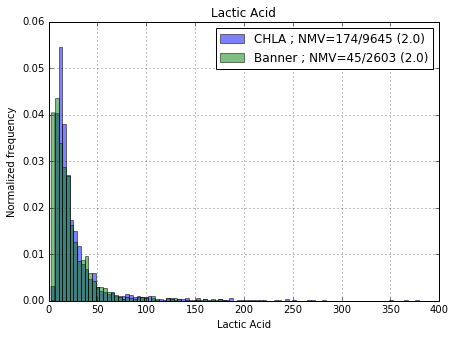

In [17]:
lactic_acid_df_banner = pd.read_pickle(os.path.join(fileDir, 'item_df_banner', 'banner_lactic_acid_df.pkl'))
lactic_acid_df_ism = pd.read_pickle(os.path.join(fileDir, 'item_df_ism', 'ism_lactic_acid_df.pkl'))
lactic_acid_banner = lactic_acid_df_banner.RESULT_VAL_num
lactic_acid_ism = lactic_acid_df_ism.value1

# ISM: mg/dl, Banner: mmol/l
plotHistogram1(lactic_acid_ism, lactic_acid_banner*9.009, 'Lactic Acid')

Albumin
Albumin range: 0.5 to 6.1
CHLA average: 2.9579799813
Banner average: 3.08095680446


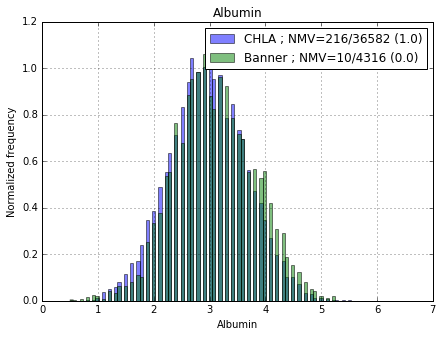

In [18]:
albumin_df_banner = pd.read_pickle(os.path.join(fileDir, 'item_df_banner', 'banner_albumin_df.pkl'))
albumin_df_ism = pd.read_pickle(os.path.join(fileDir, 'item_df_ism', 'ism_albumin_df.pkl'))
albumin_banner = albumin_df_banner.RESULT_VAL_num
albumin_ism = albumin_df_ism.value1

# ISM: g/dl, Banner: mmol/l
plotHistogram1(albumin_ism, albumin_banner, 'Albumin')

Platelet
Platelet range: 2.0 to 1520.0
CHLA average: 218.042848326
Banner average: 269.89025894


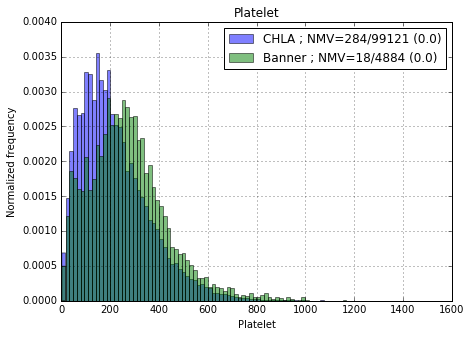

In [19]:
platelet_df_banner = pd.read_pickle(os.path.join(fileDir, 'item_df_banner', 'banner_platelet_df.pkl'))
platelet_df_ism = pd.read_pickle(os.path.join(fileDir, 'item_df_ism', 'ism_platelet_df.pkl'))
platelet_banner = platelet_df_banner.RESULT_VAL_num
platelet_ism = platelet_df_ism.value1

# ISM: g/dl, Banner: mmol/l
plotHistogram1(platelet_ism, platelet_banner, 'Platelet')

Urine
Urine range: -5.755162594 to 186.100006104
CHLA average: 3.87112323011
Banner average: 3.77062466608


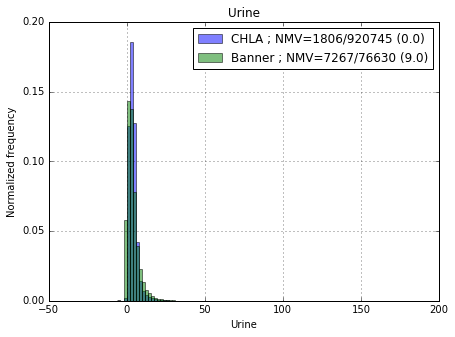

In [20]:
urine_df_banner = pd.read_pickle(os.path.join(fileDir, 'item_df_banner', 'banner_urine_df.pkl'))
urine_df_ism = pd.read_pickle(os.path.join(fileDir, 'item_df_ism', 'ism_urine_df.pkl'))
urine_banner = urine_df_banner.RESULT_VAL_num
urine_ism = urine_df_ism.value1

# ISM: g/dl, Banner: mmol/l
plotHistogram1(urine_ism, urine_banner, 'Urine')